In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:

import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:


#It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

#1.age: The person's age in years

#2.sex: The person's sex (1 = male, 0 = female)

#3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

#4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

#5.chol: The person's cholesterol measurement in mg/dl

#6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

#7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

#8.thalach: The person's maximum heart rate achieved

#9.exang: Exercise induced angina (1 = yes; 0 = no)

#10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

#11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

#12.ca: The number of major vessels (0-3)

#14.target: Heart disease (0 = no, 1 = yes)


In [4]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [5]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

Using TensorFlow backend.
C:\Users\akhil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\akhil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\akhil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\akhil\AppData\Roa

In [8]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
  import sys
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [9]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6935 - acc: 0.4917
Epoch 2/100
242/242 [==============================] - 0s 229us/step - loss: 0.6877 - acc: 0.5413
Epoch 3/100
242/242 [==============================] - 0s 213us/step - loss: 0.6860 - acc: 0.5413
Epoch 4/100
242/242 [==============================] - 0s 219us/step - loss: 0.6824 - acc: 0.5413
Epoch 5/100
242/242 [==============================] - 0s 205us/step - loss: 0.6766 - acc: 0.5413
Epoch 6/100
242/242 [==============================] - 0s 203us/step - loss: 0.6665 - acc: 0.6364
Epoch 7/100
242/242 [==============================] - 0s 259us/step - loss: 0.6521 - acc: 0.6157
Epoch 8/100
242/242 [==============================] - 0s 218us/step - loss: 0.6326 - acc: 0.6694
Epoch 9/100
242/242 [==============================] - 0s 212us/step - loss: 0.6159 - acc: 0.7066
Epoch 10/100
242/242 [==============================] - 0s 259us/step - loss: 0.6006 - acc: 0.6942
Epoch 11/100
242/242 

In [55]:
y_pred = classifier.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
#sns.heatmap(cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac*100)
ac=ac*100



accuracy of the model:  86.88524590163934


In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/Monk5088/College-project/master/heart.csv')

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline



In [13]:
x_data= data.drop('target',axis=1)
y=data['target']

In [14]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

# taking the labels out from the data

y = data['target']

data = data.drop('target', axis = 1)

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be 

In [15]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [17]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [40]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
uu= lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = uu
print("Test Accuracy {:.2f}%".format(uu))

Test Accuracy 85.25%


C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
u=(knn.score(x_test.T, y_test.T)*100)
print(u)

83.60655737704919


In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

uuu = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = uuu
print("Decision Tree Test Accuracy {:.2f}%".format(uuu))

Decision Tree Test Accuracy 78.69%


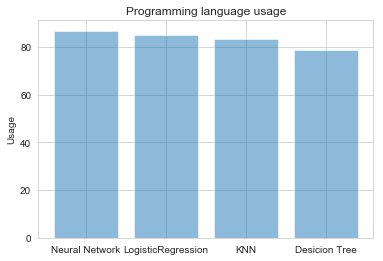

In [56]:
objects = ("Neural Network", "LogisticRegression","KNN","Desicion Tree")
y_pos = np.arange(len(objects))
performance = [ac,uu,u,uuu]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()